## Correlação cruzada

In [9]:
import matplotlib as mpl
rc_fonts = {'figure.figsize': (15, 9.3),'font.size':18}
mpl.rcParams.update(rc_fonts)

!['Correlação cruzada'](https://robosub.eecs.wsu.edu/wiki/lib/exe/fetch.php?tok=aa8260&media=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FVVPKOXc6aY1Lq%2Fsource.gif)

Fonte: https://robosub.eecs.wsu.edu/wiki/ee/hydrophones/start

https://www.tylervigen.com/spurious-correlations

In [ ]:
import numpy as np

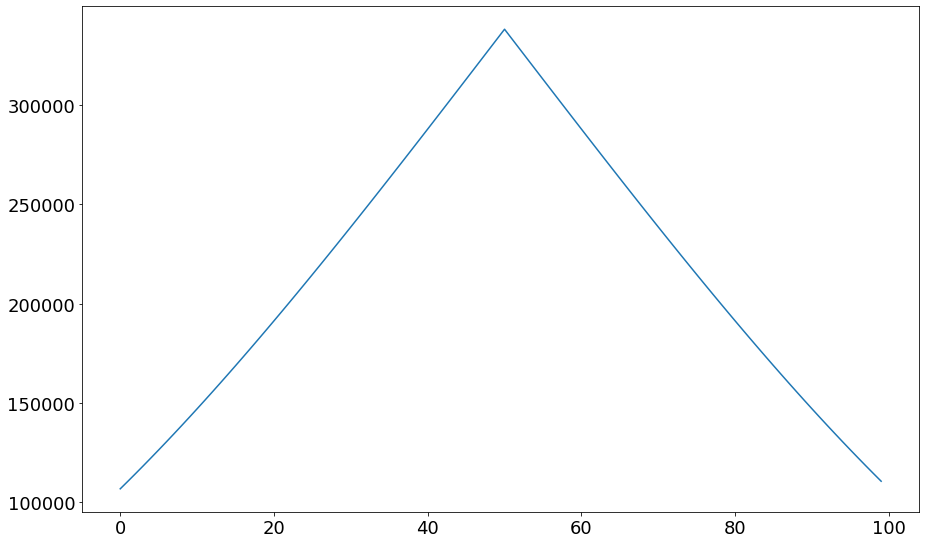

In [ ]:
plt.plot(np.correlate(np.linspace(1,100,100), np.linspace(1,100,100), "same"))

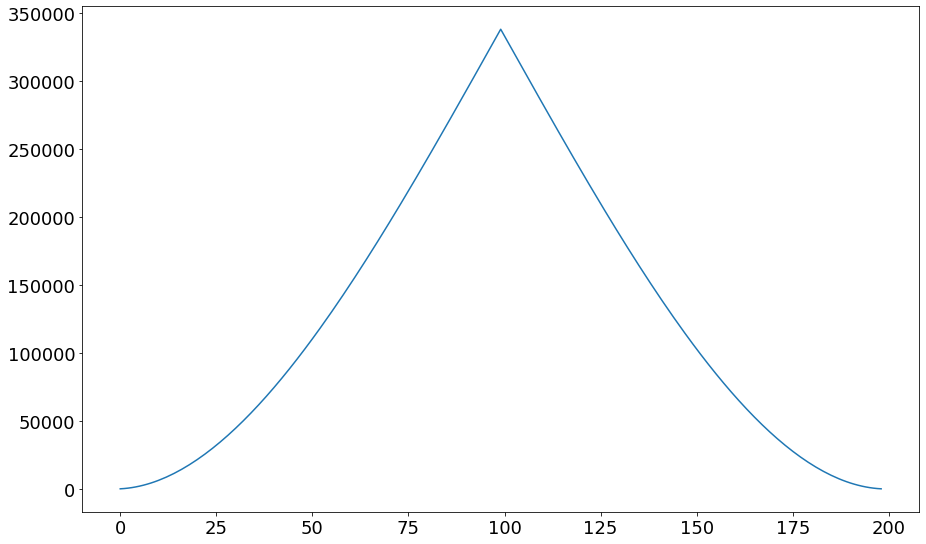

In [ ]:
plt.plot(np.correlate(np.linspace(1,100,100), np.linspace(1,100,100), "full"))

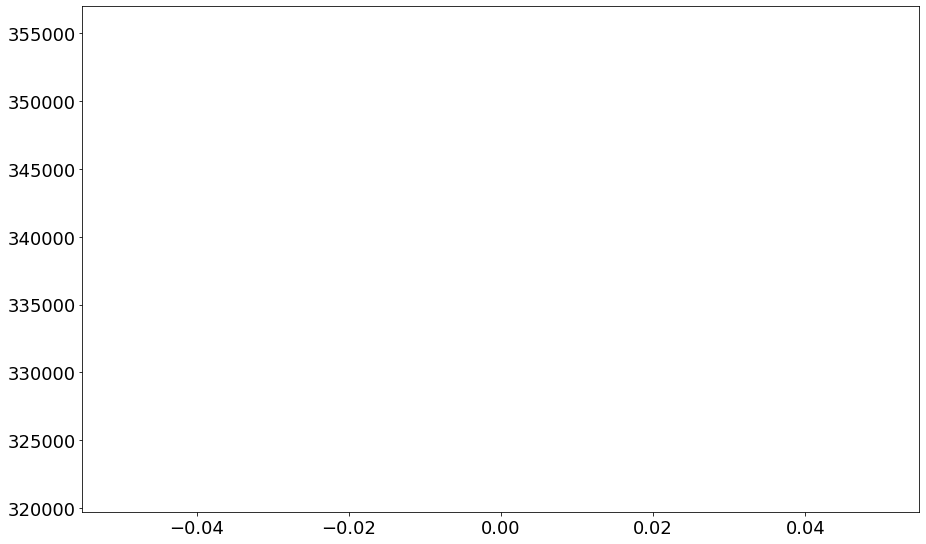

In [ ]:
plt.plot(np.correlate(np.linspace(1,100,100), np.linspace(1,100,100), "valid"))

In [ ]:
from statsmodels.tsa.stattools import ccf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



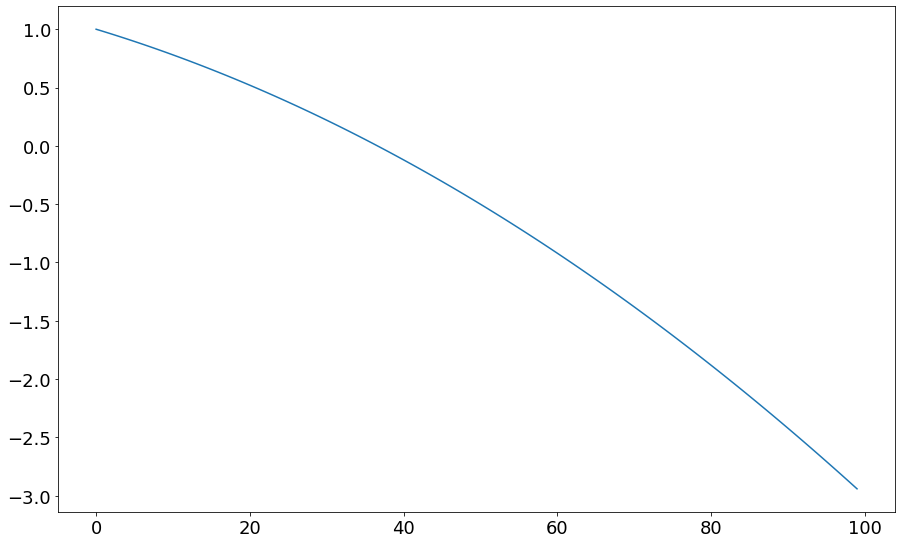

In [ ]:
plt.plot(ccf(np.linspace(1,100,100), np.linspace(1,100,100), unbiased=True))

https://numpy.org/doc/stable/reference/generated/numpy.convolve.html

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html

In [8]:
import pandas as pd

In [10]:
dado = pd.read_csv('https://raw.githubusercontent.com/allanspadini/live_bootcamp_cross_validation/main/daily-min-temperatures.csv')

In [11]:
dado.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [12]:
dado['Date'] = pd.to_datetime(dado['Date'])

In [13]:
import seaborn as sns

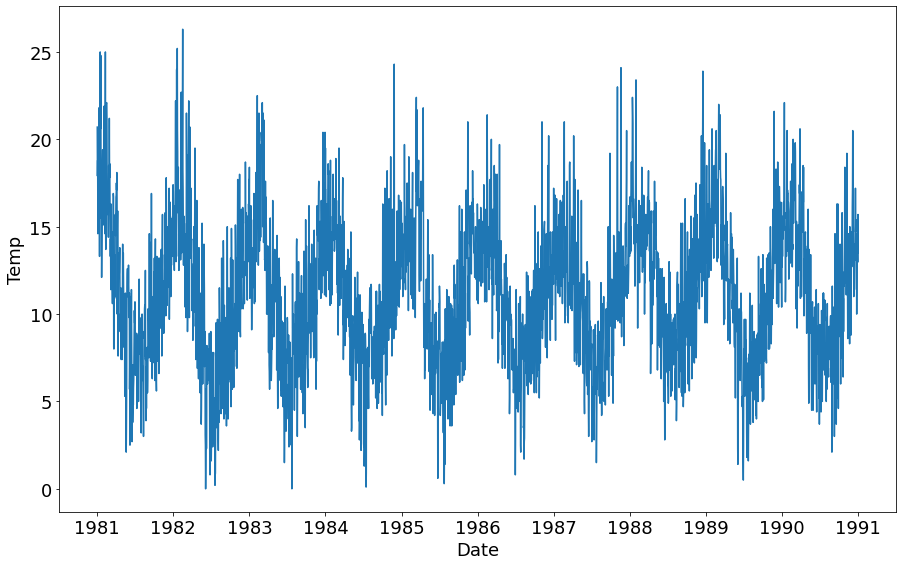

In [14]:
sns.lineplot(x='Date',y='Temp',data=dado)

In [15]:
df = pd.DataFrame()

In [16]:
df['ds'] = dado['Date']
df['y'] = dado['Temp']

In [17]:
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


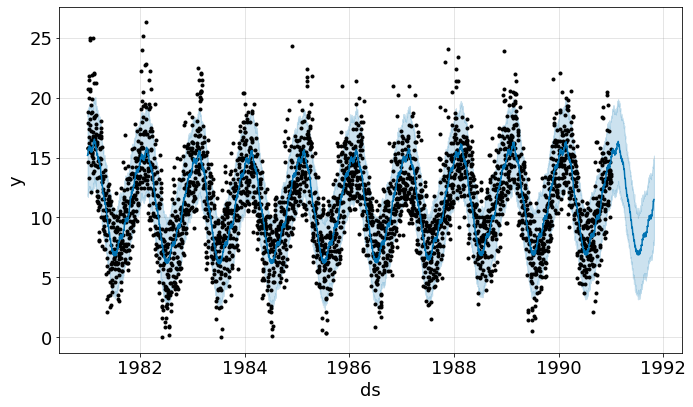

In [18]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=300)
forecast = model.predict(future)
fig = model.plot(forecast)

In [19]:
import matplotlib.pyplot as plt

(0.0, 40.0)

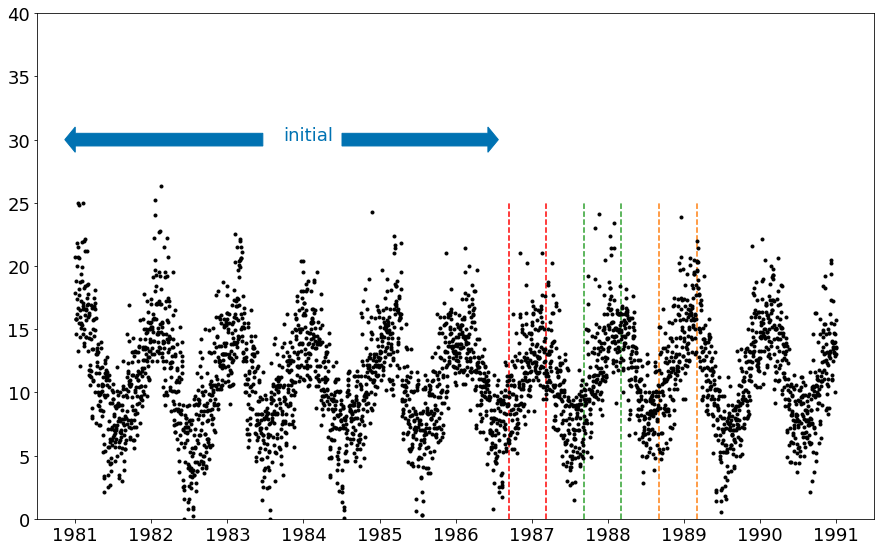

In [20]:
plt.plot(df['ds'], df['y'], 'k.')
plt.vlines([df['ds'][2080], df['ds'][2260]], 0, 25, colors='r', linestyles='--') #Avaliando um trecho de 180 dias
plt.vlines([df['ds'][2440], df['ds'][2620]], 0, 25, colors='tab:green', linestyles='--')
plt.vlines([df['ds'][2800], df['ds'][2980]], 0, 25, colors='tab:orange', linestyles='--')

plt.arrow(df['ds'][900], 30, -900, 0, width=1, head_width=2, head_length=50, color='#0072B2')
plt.arrow(df['ds'][1280], 30, 700, 0, width=1, head_width=2, head_length=50, color='#0072B2')
plt.text(df['ds'][1000], 30, 'initial', color='#0072B2')

plt.ylim(0,40)




In [21]:
from fbprophet.diagnostics import cross_validation

In [22]:
df_cv = cross_validation(model, initial='2080 days', period='180 days', horizon = '180 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 1987-01-21 00:00:00 and 1990-07-04 00:00:00


In [23]:
from fbprophet.plot import plot_cross_validation_metric

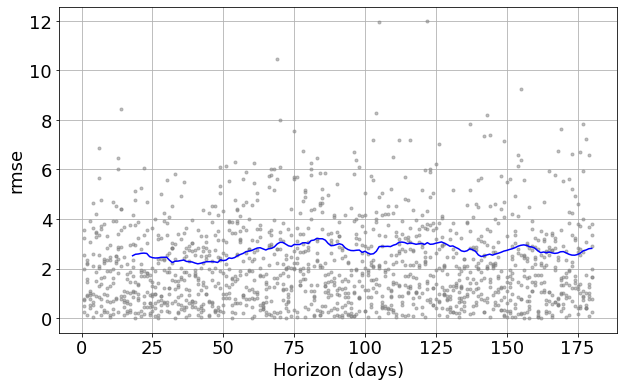

In [24]:
fig = plot_cross_validation_metric(df_cv,metric='rmse')